### Initializing useful libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


#### Reading the dataset

In [2]:

def read_dataset():
    df=pd.read_csv("sonar.csv")
    print("Data Loaded Sucessfully")
    print("Number Of Columns:",len(df.columns))

    #Features of DataSet
    X=df[df.columns[0:60]].values

    #Labels of DataSet
    y=df[df.columns[60]]

    # Encode the Dependant Variable
    encoder=LabelEncoder()

    # Encode Labels into integers i.e  1 or 0 (One hot encode)
    encoder.fit(y)
    y=encoder.transform(y)
    Y=one_hot_encode(y)

    print("X.Shape ",X.shape)

    return (X,Y)

#### Define the one hot encoder function to set M => 1, R => 0


In [3]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode =np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),labels]=1
    return one_hot_encode

#### Model for training

In [4]:

def multilayer_perceptron(x, weights, biases):

    # hidden layer with RELU activation
    # First layer performs matrix multiplications of inputs with weights
    layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
    layer_1 = tf.sigmoid(layer_1)

    # hidden layer with sigmoid activation
    # Second layer performs matrix multiplications of layer1 with weights
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.sigmoid(layer_2)

    # hidden layer with sigmoid activation
    # Third layer performs matrix multiplications of layer2 with weights
    layer_3 = tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
    layer_3 = tf.sigmoid(layer_3)

    # hidden layer with RELU activation
    # Fourth layer performs matrix multiplications of layer3 with weights
    layer_4 = tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
    layer_4 = tf.sigmoid(layer_4)

    # Output layers with linear activations
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

#### Reading the dataset using read_dataset function

In [5]:
X,Y = read_dataset()

Data Loaded Sucessfully
Number Of Columns: 61
X.Shape  (207, 60)


#### Shuffle the dataset to mix up the rows

In [6]:
X,Y = shuffle(X,Y, random_state=1)

#### split the dataset into training and testing adatset using
#### train_tset_split method in sklearn.model_selection

In [7]:
train_x , test_x , train_y , test_y = train_test_split(X, Y, test_size=0.20 ,random_state= 20)

#### Defining the important parameters and variables to work with tensors

In [8]:
learning_rate = 0.3
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)
n_dim=X.shape[1]
print("n_dim",n_dim)
n_class=2
model_path="C:\\Users\HP\\Desktop\\Naval Mine"


n_hidden_1=60
n_hidden_2=60
n_hidden_3=60
n_hidden_4=60


x=tf.placeholder(tf.float32,[None,n_dim])
W=tf.Variable(tf.zeros([n_dim, n_class]))
b=tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32,[None, n_class])



weights = {
'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
'h2': tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}

biases={
'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
'out':tf.Variable(tf.truncated_normal([n_class]))
}

n_dim 60


#### Initializing all the variables

In [9]:
init = tf.global_variables_initializer()

saver = tf.train.Saver()

#### Define your model

In [10]:
y = multilayer_perceptron(x, weights, biases)

#### Define the cost function and optimizer


In [11]:
cost_function =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step =  tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



#### Calculating the Cost and Accuracy for each Epoch


In [12]:
mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={x: train_x,y_: train_y})
    cost = sess.run(cost_function,feed_dict={x: train_x,y_: train_y})
    cost_history= np.append(cost_history,cost)
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    # print("accuracy: " ,sess.run(accuracy,feed_dict={x: train_x,y_: train_y}))
    pred_y = sess.run(y,feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = (sess.run(accuracy,feed_dict={x: train_x,y_: train_y}))
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy,feed_dict={x: train_x,y_: train_y}))
    accuracy_history.append(accuracy)

    print('epoch : ',epoch , ' - ','cost: ',cost ,"-MSE: ",mse_,"-train_accuracy",accuracy)

save_path = saver.save(sess, model_path)
print("MOdel saved in file: %s" % save_path)

epoch :  0  -  cost:  4.240563 -MSE:  0.47878787 -train_accuracy 0.47878787
epoch :  1  -  cost:  2.253223 -MSE:  0.5212121 -train_accuracy 0.5212121
epoch :  2  -  cost:  2.9054909 -MSE:  0.47878787 -train_accuracy 0.47878787
epoch :  3  -  cost:  2.489268 -MSE:  0.5212121 -train_accuracy 0.5212121
epoch :  4  -  cost:  2.1341846 -MSE:  0.47878787 -train_accuracy 0.47878787
epoch :  5  -  cost:  2.505263 -MSE:  0.5212121 -train_accuracy 0.5212121
epoch :  6  -  cost:  1.8618549 -MSE:  0.47878787 -train_accuracy 0.47878787
epoch :  7  -  cost:  2.3347816 -MSE:  0.5212121 -train_accuracy 0.5212121
epoch :  8  -  cost:  1.7202855 -MSE:  0.47878787 -train_accuracy 0.47878787
epoch :  9  -  cost:  2.1313875 -MSE:  0.5212121 -train_accuracy 0.5212121
epoch :  10  -  cost:  1.5841575 -MSE:  0.47878787 -train_accuracy 0.47878787
epoch :  11  -  cost:  2.066782 -MSE:  0.5212121 -train_accuracy 0.5212121
epoch :  12  -  cost:  1.523572 -MSE:  0.47878787 -train_accuracy 0.47878787
epoch :  13  -

epoch :  107  -  cost:  1.3514383 -MSE:  0.5212121 -train_accuracy 0.5212121
epoch :  108  -  cost:  1.197395 -MSE:  0.47878787 -train_accuracy 0.47878787
epoch :  109  -  cost:  1.3425332 -MSE:  0.5212121 -train_accuracy 0.5212121
epoch :  110  -  cost:  1.1925244 -MSE:  0.47878787 -train_accuracy 0.47878787
epoch :  111  -  cost:  1.3339742 -MSE:  0.5212121 -train_accuracy 0.5212121
epoch :  112  -  cost:  1.1876787 -MSE:  0.47878787 -train_accuracy 0.47878787
epoch :  113  -  cost:  1.3257308 -MSE:  0.5212121 -train_accuracy 0.5212121
epoch :  114  -  cost:  1.182845 -MSE:  0.47878787 -train_accuracy 0.47878787
epoch :  115  -  cost:  1.3177698 -MSE:  0.5212121 -train_accuracy 0.5212121
epoch :  116  -  cost:  1.1780059 -MSE:  0.47878787 -train_accuracy 0.47878787
epoch :  117  -  cost:  1.3100457 -MSE:  0.5212121 -train_accuracy 0.5212121
epoch :  118  -  cost:  1.1731416 -MSE:  0.47878787 -train_accuracy 0.47878787
epoch :  119  -  cost:  1.302502 -MSE:  0.5212121 -train_accuracy 

epoch :  213  -  cost:  1.059403 -MSE:  0.5212121 -train_accuracy 0.5212121
epoch :  214  -  cost:  0.9839902 -MSE:  0.47878787 -train_accuracy 0.47878787
epoch :  215  -  cost:  1.0550741 -MSE:  0.5212121 -train_accuracy 0.5212121
epoch :  216  -  cost:  0.9800675 -MSE:  0.47878787 -train_accuracy 0.47878787
epoch :  217  -  cost:  1.050582 -MSE:  0.5212121 -train_accuracy 0.5212121
epoch :  218  -  cost:  0.9760023 -MSE:  0.47878787 -train_accuracy 0.47878787
epoch :  219  -  cost:  1.0459195 -MSE:  0.5212121 -train_accuracy 0.5212121
epoch :  220  -  cost:  0.9717887 -MSE:  0.47878787 -train_accuracy 0.47878787
epoch :  221  -  cost:  1.0410793 -MSE:  0.5212121 -train_accuracy 0.5212121
epoch :  222  -  cost:  0.9674223 -MSE:  0.47878787 -train_accuracy 0.47878787
epoch :  223  -  cost:  1.0360548 -MSE:  0.5212121 -train_accuracy 0.5212121
epoch :  224  -  cost:  0.9628984 -MSE:  0.47878787 -train_accuracy 0.47878787
epoch :  225  -  cost:  1.0308397 -MSE:  0.5212121 -train_accuracy

epoch :  320  -  cost:  0.7699244 -MSE:  0.54545456 -train_accuracy 0.54545456
epoch :  321  -  cost:  0.814708 -MSE:  0.6181818 -train_accuracy 0.6181818
epoch :  322  -  cost:  0.7671743 -MSE:  0.54545456 -train_accuracy 0.54545456
epoch :  323  -  cost:  0.81191295 -MSE:  0.6181818 -train_accuracy 0.6181818
epoch :  324  -  cost:  0.7644088 -MSE:  0.54545456 -train_accuracy 0.54545456
epoch :  325  -  cost:  0.8090996 -MSE:  0.6181818 -train_accuracy 0.6181818
epoch :  326  -  cost:  0.7616259 -MSE:  0.54545456 -train_accuracy 0.54545456
epoch :  327  -  cost:  0.80626535 -MSE:  0.6181818 -train_accuracy 0.6181818
epoch :  328  -  cost:  0.7588235 -MSE:  0.54545456 -train_accuracy 0.54545456
epoch :  329  -  cost:  0.8034075 -MSE:  0.6181818 -train_accuracy 0.6181818
epoch :  330  -  cost:  0.7559997 -MSE:  0.55151516 -train_accuracy 0.55151516
epoch :  331  -  cost:  0.8005238 -MSE:  0.6181818 -train_accuracy 0.6181818
epoch :  332  -  cost:  0.7531529 -MSE:  0.55151516 -train_accu

epoch :  426  -  cost:  0.6171856 -MSE:  0.6484848 -train_accuracy 0.6484848
epoch :  427  -  cost:  0.65728515 -MSE:  0.6848485 -train_accuracy 0.6848485
epoch :  428  -  cost:  0.6142666 -MSE:  0.6545454 -train_accuracy 0.6545454
epoch :  429  -  cost:  0.654171 -MSE:  0.6909091 -train_accuracy 0.6909091
epoch :  430  -  cost:  0.6113777 -MSE:  0.6545454 -train_accuracy 0.6545454
epoch :  431  -  cost:  0.65108824 -MSE:  0.6909091 -train_accuracy 0.6909091
epoch :  432  -  cost:  0.6085242 -MSE:  0.6545454 -train_accuracy 0.6545454
epoch :  433  -  cost:  0.64804506 -MSE:  0.6909091 -train_accuracy 0.6909091
epoch :  434  -  cost:  0.60570943 -MSE:  0.6666667 -train_accuracy 0.6666667
epoch :  435  -  cost:  0.64504707 -MSE:  0.6909091 -train_accuracy 0.6909091
epoch :  436  -  cost:  0.60293525 -MSE:  0.6666667 -train_accuracy 0.6666667
epoch :  437  -  cost:  0.64209735 -MSE:  0.6909091 -train_accuracy 0.6909091
epoch :  438  -  cost:  0.6002021 -MSE:  0.6666667 -train_accuracy 0.6

epoch :  532  -  cost:  0.48074934 -MSE:  0.73333335 -train_accuracy 0.73333335
epoch :  533  -  cost:  0.52456385 -MSE:  0.75757575 -train_accuracy 0.75757575
epoch :  534  -  cost:  0.47803044 -MSE:  0.73333335 -train_accuracy 0.73333335
epoch :  535  -  cost:  0.5220733 -MSE:  0.76363635 -train_accuracy 0.76363635
epoch :  536  -  cost:  0.47530267 -MSE:  0.73939395 -train_accuracy 0.73939395
epoch :  537  -  cost:  0.51957035 -MSE:  0.76363635 -train_accuracy 0.76363635
epoch :  538  -  cost:  0.47256646 -MSE:  0.73939395 -train_accuracy 0.73939395
epoch :  539  -  cost:  0.5170543 -MSE:  0.76363635 -train_accuracy 0.76363635
epoch :  540  -  cost:  0.46982205 -MSE:  0.73939395 -train_accuracy 0.73939395
epoch :  541  -  cost:  0.51452553 -MSE:  0.76363635 -train_accuracy 0.76363635
epoch :  542  -  cost:  0.46706995 -MSE:  0.73939395 -train_accuracy 0.73939395
epoch :  543  -  cost:  0.51198334 -MSE:  0.76363635 -train_accuracy 0.76363635
epoch :  544  -  cost:  0.46431017 -MSE:  

epoch :  639  -  cost:  0.37235296 -MSE:  0.8060606 -train_accuracy 0.8060606
epoch :  640  -  cost:  0.32987106 -MSE:  0.8484849 -train_accuracy 0.8484849
epoch :  641  -  cost:  0.369405 -MSE:  0.8181818 -train_accuracy 0.8181818
epoch :  642  -  cost:  0.3273246 -MSE:  0.8484849 -train_accuracy 0.8484849
epoch :  643  -  cost:  0.3664828 -MSE:  0.8242424 -train_accuracy 0.8242424
epoch :  644  -  cost:  0.32480562 -MSE:  0.8484849 -train_accuracy 0.8484849
epoch :  645  -  cost:  0.36358827 -MSE:  0.8242424 -train_accuracy 0.8242424
epoch :  646  -  cost:  0.32231516 -MSE:  0.8545455 -train_accuracy 0.8545455
epoch :  647  -  cost:  0.36072305 -MSE:  0.8242424 -train_accuracy 0.8242424
epoch :  648  -  cost:  0.31985387 -MSE:  0.8545455 -train_accuracy 0.8545455
epoch :  649  -  cost:  0.35788825 -MSE:  0.8242424 -train_accuracy 0.8242424
epoch :  650  -  cost:  0.31742233 -MSE:  0.8606061 -train_accuracy 0.8606061
epoch :  651  -  cost:  0.35508502 -MSE:  0.8242424 -train_accuracy 

epoch :  745  -  cost:  0.25170648 -MSE:  0.8787879 -train_accuracy 0.8787879
epoch :  746  -  cost:  0.22739092 -MSE:  0.90909094 -train_accuracy 0.90909094
epoch :  747  -  cost:  0.24968803 -MSE:  0.8848485 -train_accuracy 0.8848485
epoch :  748  -  cost:  0.22571607 -MSE:  0.90909094 -train_accuracy 0.90909094
epoch :  749  -  cost:  0.24765581 -MSE:  0.8848485 -train_accuracy 0.8848485
epoch :  750  -  cost:  0.22403218 -MSE:  0.90909094 -train_accuracy 0.90909094
epoch :  751  -  cost:  0.2456079 -MSE:  0.8848485 -train_accuracy 0.8848485
epoch :  752  -  cost:  0.22233805 -MSE:  0.90909094 -train_accuracy 0.90909094
epoch :  753  -  cost:  0.24354306 -MSE:  0.8848485 -train_accuracy 0.8848485
epoch :  754  -  cost:  0.22063203 -MSE:  0.90909094 -train_accuracy 0.90909094
epoch :  755  -  cost:  0.24145898 -MSE:  0.8909091 -train_accuracy 0.8909091
epoch :  756  -  cost:  0.21891274 -MSE:  0.90909094 -train_accuracy 0.90909094
epoch :  757  -  cost:  0.23935397 -MSE:  0.8909091 -

epoch :  850  -  cost:  0.09781752 -MSE:  0.9757576 -train_accuracy 0.9757576
epoch :  851  -  cost:  0.09786434 -MSE:  0.9757576 -train_accuracy 0.9757576
epoch :  852  -  cost:  0.097690955 -MSE:  0.9757576 -train_accuracy 0.9757576
epoch :  853  -  cost:  0.0979259 -MSE:  0.9757576 -train_accuracy 0.9757576
epoch :  854  -  cost:  0.09787013 -MSE:  0.969697 -train_accuracy 0.969697
epoch :  855  -  cost:  0.09839846 -MSE:  0.9757576 -train_accuracy 0.9757576
epoch :  856  -  cost:  0.098529056 -MSE:  0.969697 -train_accuracy 0.969697
epoch :  857  -  cost:  0.09955307 -MSE:  0.969697 -train_accuracy 0.969697
epoch :  858  -  cost:  0.10001499 -MSE:  0.969697 -train_accuracy 0.969697
epoch :  859  -  cost:  0.101974994 -MSE:  0.96363634 -train_accuracy 0.96363634
epoch :  860  -  cost:  0.10312868 -MSE:  0.969697 -train_accuracy 0.969697
epoch :  861  -  cost:  0.10717935 -MSE:  0.96363634 -train_accuracy 0.96363634
epoch :  862  -  cost:  0.11017365 -MSE:  0.9757576 -train_accuracy 

epoch :  956  -  cost:  0.067542754 -MSE:  0.9818182 -train_accuracy 0.9818182
epoch :  957  -  cost:  0.067250885 -MSE:  0.9818182 -train_accuracy 0.9818182
epoch :  958  -  cost:  0.06696015 -MSE:  0.9818182 -train_accuracy 0.9818182
epoch :  959  -  cost:  0.06667059 -MSE:  0.9818182 -train_accuracy 0.9818182
epoch :  960  -  cost:  0.06638215 -MSE:  0.9818182 -train_accuracy 0.9818182
epoch :  961  -  cost:  0.06609481 -MSE:  0.9818182 -train_accuracy 0.9818182
epoch :  962  -  cost:  0.065808624 -MSE:  0.9818182 -train_accuracy 0.9818182
epoch :  963  -  cost:  0.06552347 -MSE:  0.9818182 -train_accuracy 0.9818182
epoch :  964  -  cost:  0.06523944 -MSE:  0.9818182 -train_accuracy 0.9818182
epoch :  965  -  cost:  0.06495645 -MSE:  0.9818182 -train_accuracy 0.9818182
epoch :  966  -  cost:  0.06467452 -MSE:  0.9818182 -train_accuracy 0.9818182
epoch :  967  -  cost:  0.06439368 -MSE:  0.9818182 -train_accuracy 0.9818182
epoch :  968  -  cost:  0.06411381 -MSE:  0.9818182 -train_ac

#### Plotting the Mean Squared Error and the Accuracy 


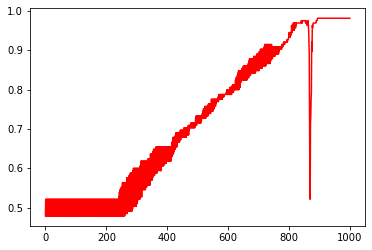

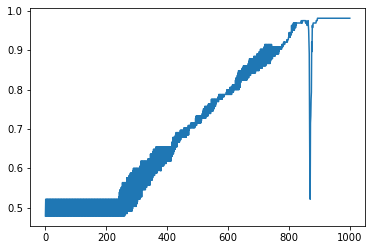

In [13]:
plt.plot(mse_history, 'r')
plt.show()
plt.plot(accuracy_history)
plt.show()

#### Printing the Final Test Accuracy

In [14]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ",(sess.run(accuracy, feed_dict={x: test_x,y_:test_y})))

Test Accuracy:  0.88095236


#### Printing the Final Mean Squared Error

In [15]:
pred_y = sess.run(y,feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y-test_y))
print("MSE: %.4f"% sess.run(mse))

MSE: 7.3605
